# **1. Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# **2. Loading Dataset**

In [2]:
df = pd.read_csv('feeds (1).csv')

df.head()

,created_at,entry_id,field1,field2,latitude,longitude,elevation,status
0,2024-12-11T12:41:13+00:00,1,402.81,0.64,NaN,NaN,NaN,NaN
1,2024-12-11T12:41:29+00:00,2,402.69,0.65,NaN,NaN,NaN,NaN
2,2024-12-11T12:41:45+00:00,3,402.76,0.64,NaN,NaN,NaN,NaN
3,2024-12-11T12:42:01+00:00,4,402.66,0.65,NaN,NaN,NaN,NaN
4,2024-12-11T12:42:17+00:00,5,402.66,0.65,NaN,NaN,NaN,NaN


In [3]:
df.drop(columns=['latitude', 'longitude', 'elevation', 'status'], inplace=True)

df.head()

,created_at,entry_id,field1,field2
0,2024-12-11T12:41:13+00:00,1,402.81,0.64
1,2024-12-11T12:41:29+00:00,2,402.69,0.65
2,2024-12-11T12:41:45+00:00,3,402.76,0.64
3,2024-12-11T12:42:01+00:00,4,402.66,0.65
4,2024-12-11T12:42:17+00:00,5,402.66,0.65


In [4]:
df.rename(columns={'field1': 'CO2', 'field2': 'CO'}, inplace=True)

df.head(3)

,created_at,entry_id,CO2,CO
0,2024-12-11T12:41:13+00:00,1,402.81,0.64
1,2024-12-11T12:41:29+00:00,2,402.69,0.65
2,2024-12-11T12:41:45+00:00,3,402.76,0.64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160785 entries, 0 to 160784
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   created_at  160785 non-null  object 
 1   entry_id    160785 non-null  int64  
 2   CO2         160785 non-null  float64
 3   CO          160785 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.9+ MB


In [6]:
df['created_at'] = pd.to_datetime(df['created_at'])

# **3. Exploratory Data Analysis**

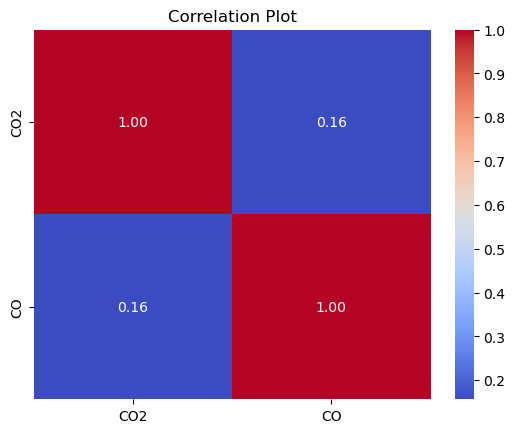

In [7]:
correlation = df[['CO2', 'CO']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot')
plt.show()

In [8]:
numeric_feature = df.select_dtypes(include='float64')

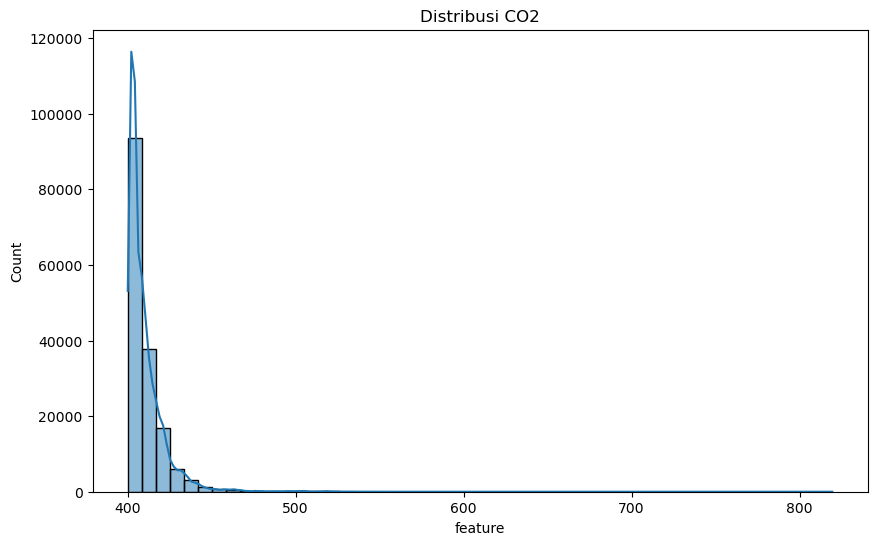

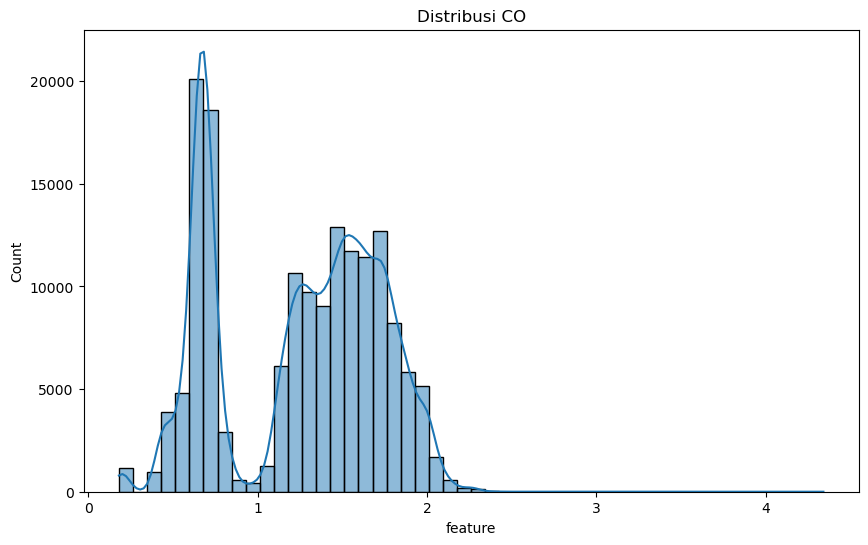

In [9]:
numeric_feature = df.select_dtypes(include='float64')

for feature in numeric_feature:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=50)
    plt.title(f"Distribusi {feature}")
    plt.xlabel("feature")

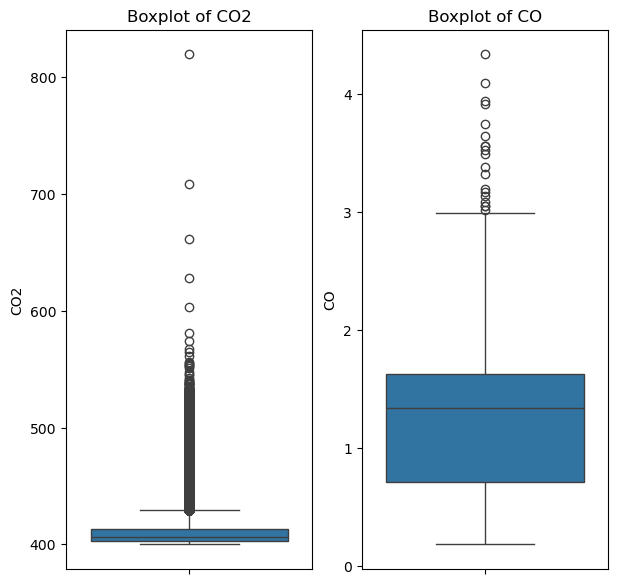

In [10]:
plt.figure(figsize=(7, 7))

plt.subplot2grid((2, 2), (0, 0), rowspan=2, colspan=1)
sns.boxplot( df['CO2'], label='CO2')
plt.title("Boxplot of CO2")


plt.subplot2grid((2, 2), (0, 1), rowspan=2, colspan=1)
sns.boxplot(df['CO'], label='CO')
plt.title("Boxplot of CO")
plt.show()



In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

created_at    0
entry_id      0
CO2           0
CO            0
dtype: int64

In [13]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean = df.loc[condition, df.columns]

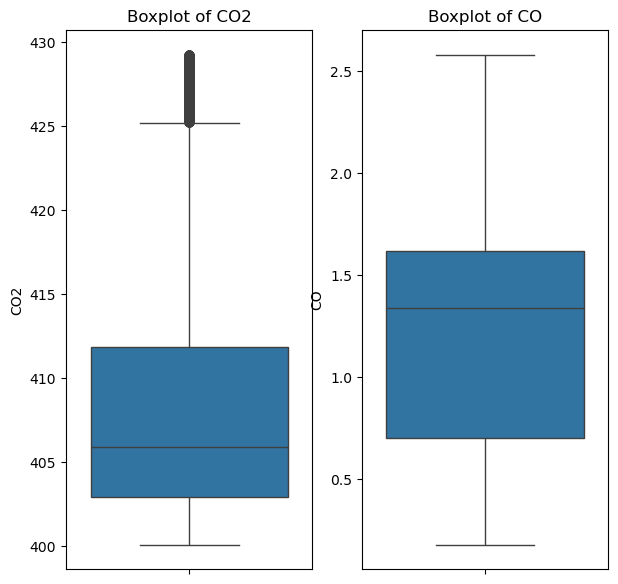

In [14]:
plt.figure(figsize=(7, 7))

plt.subplot2grid((2, 2), (0, 0), rowspan=2, colspan=1)
sns.boxplot( df_clean['CO2'], label='CO2')
plt.title("Boxplot of CO2")


plt.subplot2grid((2, 2), (0, 1), rowspan=2, colspan=1)
sns.boxplot(df_clean['CO'], label='CO')
plt.title("Boxplot of CO")
plt.show()

In [15]:
scaler = StandardScaler()

df_scaled = df_clean.copy()

df_scaled[['CO2', 'CO']] = scaler.fit_transform(df_scaled[['CO2', 'CO']])

df_scaled.head()

,created_at,entry_id,CO2,CO
0,2024-12-11 12:41:13+00:00,1,-0.784149,-1.283644
1,2024-12-11 12:41:29+00:00,2,-0.801989,-1.262227
2,2024-12-11 12:41:45+00:00,3,-0.791582,-1.283644
3,2024-12-11 12:42:01+00:00,4,-0.806449,-1.262227
4,2024-12-11 12:42:17+00:00,5,-0.806449,-1.262227


**Melatih Model Prediksi CO2**

In [16]:
df_scaled

,created_at,entry_id,CO2,CO
0,2024-12-11 12:41:13+00:00,1,-0.784149,-1.283644
1,2024-12-11 12:41:29+00:00,2,-0.801989,-1.262227
2,2024-12-11 12:41:45+00:00,3,-0.791582,-1.283644
3,2024-12-11 12:42:01+00:00,4,-0.806449,-1.262227
4,2024-12-11 12:42:17+00:00,5,-0.806449,-1.262227
...,...,...,...,...
160768,2025-01-12 01:05:57+00:00,160769,2.504340,-0.940983
160769,2025-01-12 01:06:13+00:00,160770,2.438927,-0.940983
160773,2025-01-12 01:07:17+00:00,160774,2.812078,-0.919566
160782,2025-01-12 01:09:41+00:00,160783,2.471634,-0.940983


In [17]:
X = df_scaled.drop(columns=['CO2', 'created_at', 'entry_id'])
y = df_scaled['CO']

# membagi dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  151428
Jumlah data latih:  105999
Jumlah data test:  45429


In [18]:
y

0        -1.283644
1        -1.262227
2        -1.283644
3        -1.262227
4        -1.262227
            ...   
160768   -0.940983
160769   -0.940983
160773   -0.919566
160782   -0.940983
160783   -0.940983
Name: CO, Length: 151428, dtype: float64

In [19]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

# Melatih Model
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [20]:
pred_lr = lr.predict(x_test)

mae_lr = mean_absolute_error(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)
 
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R²: {r2_lr}")


MAE: 1.2470333324375686e-14
MSE: 2.075029175692441e-28
R²: 1.0


In [21]:
# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lr],
    'MSE': [mse_lr],
    'R2': [r2_lr]
}
 
# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['LR'])
df_results

,MAE,MSE,R2
LR,1.247033e-14,2.075029e-28,1.0


In [22]:
pred_dt = dt.predict(x_test)

mae_dt = mean_absolute_error(y_test, pred_dt)
mse_dt = mean_squared_error(y_test, pred_dt)
r2_dt = r2_score(y_test, pred_dt)
 
print(f"MAE: {mae_dt}")
print(f"MSE: {mse_dt}")
print(f"R²: {r2_dt}")

MAE: 3.299965673303475e-06
MSE: 7.067307346636105e-08
R²: 0.9999999288949274


In [23]:
df_results.loc['DT'] = [mae_dt, mse_dt, r2_dt]

In [24]:
pred_rf = rf.predict(x_test)

mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)
 
print(f"MAE: {mae_dt}")
print(f"MSE: {mse_dt}")
print(f"R²: {r2_dt}")

MAE: 3.299965673303475e-06
MSE: 7.067307346636105e-08
R²: 0.9999999288949274


In [25]:
df_results.loc['RF'] = [mae_dt, mse_dt, r2_dt]

df_results

,MAE,MSE,R2
LR,1.247033e-14,2.075029e-28,1.0
DT,3.299966e-06,7.067307e-08,1.0
RF,3.299966e-06,7.067307e-08,1.0


In [26]:
X

,CO
0,-1.283644
1,-1.262227
2,-1.283644
3,-1.262227
4,-1.262227
...,...
160768,-0.940983
160769,-0.940983
160773,-0.919566
160782,-0.940983


In [27]:
y

0        -1.283644
1        -1.262227
2        -1.283644
3        -1.262227
4        -1.262227
            ...   
160768   -0.940983
160769   -0.940983
160773   -0.919566
160782   -0.940983
160783   -0.940983
Name: CO, Length: 151428, dtype: float64

In [29]:
import numpy as np

In [30]:
y_pred_baseline = np.full_like(y_test, y_train.mean())



print("R2 baseline (prediksi rata-rata):", r2_score(y_test, y_pred_baseline))


R2 baseline (prediksi rata-rata): -0.00019034254891470148
